In [278]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

**Чтение данных**

In [279]:

data = pd.read_csv("./healthcare-dataset-stroke-data.csv")

In [280]:

data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [281]:

print(data)

         id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
1     51676  Female  61.0             0              0          Yes   
2     31112    Male  80.0             0              1          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5105  18234  Female  80.0             1              0          Yes   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0           Private          Urban             228.69  36.6  former

Этот набор данных используется для прогнозирования вероятности инсульта у пациента на основе входных параметров, таких как пол, возраст, различные заболевания и статус курения. Каждая строка в данных предоставляет актуальную информацию о пациенте.


Набор данных состоит из 5110 строк (пациенты) и 12 столбцов (признаки).


Перечислим их:

id - идентификатор [years]

gender - пол пациента ["Male", "Female" or "Other"]

age - возраст пациента

hypertension - 0, если у пациента нет гипертонии, 1, если у пациента есть гипертония

heart_disease - 0, если у пациента нет никаких сердечных заболеваний, 1, если у пациента есть заболевание сердца

never_married - женат ["Нет" или "Да"]

work_type - тип работы [ "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"]

Residence_type - проживание ["Сельский" или "Городской"]

avg_glucose_leve - средний уровень глюкозы в крови

bmi -  индекс массы тела

smoking_status - курил ли ["formerly smoked", "never smoked", "smokes" or "Unknown"*]

stroke - 1, если у пациента был инсульт, или 0, если нет



In [282]:

print(data.shape)
print(data.columns)

(5110, 12)
Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')


Посмотрим информацию по нашим столбцам.

In [283]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


**Визуализация данных и вычисление основных характеристик**

In [284]:
#Числовые колонкм
num_cols = [cname for cname in data.columns if data[cname].dtype =='int' or data[cname].dtype =='float' ]
print(num_cols)

['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']


In [285]:
#Нечисловые колонки

cat_cols = [cname for cname in data.columns if data[cname].dtype =='object']
print(cat_cols)


['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']


In [286]:
#Заменим тип 'object' на специальный, предназначенный для хранения категориальных значений:
for i in cat_cols:
  data[i] = data[i].astype('category')

In [287]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   id                 5110 non-null   int64   
 1   gender             5110 non-null   category
 2   age                5110 non-null   float64 
 3   hypertension       5110 non-null   int64   
 4   heart_disease      5110 non-null   int64   
 5   ever_married       5110 non-null   category
 6   work_type          5110 non-null   category
 7   Residence_type     5110 non-null   category
 8   avg_glucose_level  5110 non-null   float64 
 9   bmi                4909 non-null   float64 
 10  smoking_status     5110 non-null   category
 11  stroke             5110 non-null   int64   
dtypes: category(5), float64(3), int64(4)
memory usage: 305.3 KB


Найдем средние значения, стандартное отклонение, минимальное и макимальное значения, медиану и значения квартиле для числовых признаков


In [288]:
data[num_cols].describe()


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


Тоже самое сделаем для категориальных признаков


In [289]:
data[cat_cols].describe(include=['category'])

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892



Чтобы увидеть какое количество у каждого категориального признака, построим гистрограммы.

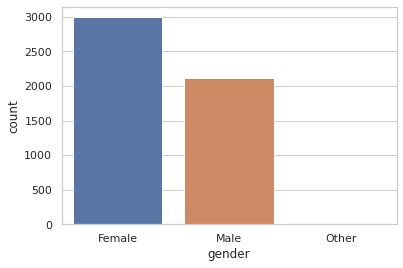

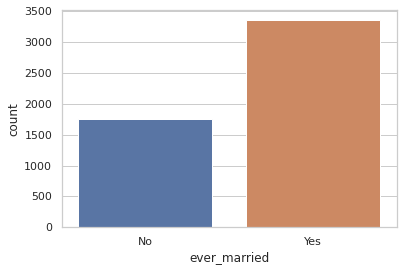

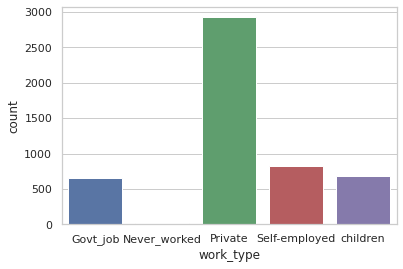

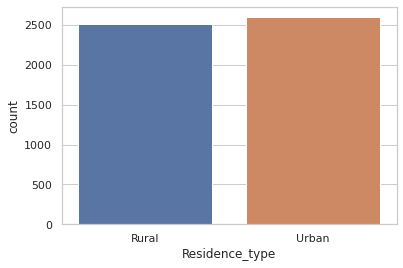

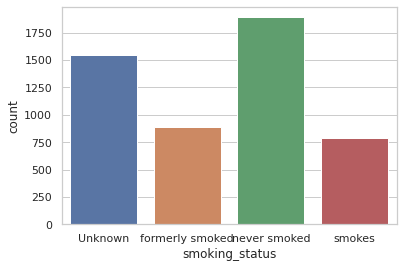

In [290]:
sns.set_theme(style="whitegrid")
for i in cat_cols: 
    sns.countplot(data = data, x = i)
    plt.show()

Из соответствующих графиков мы делаем выводы:

 - Количество пациентов мужского пола преобладает

 - Большинство из пациентов женаты/замужем

 - Распределение места жительства: 50 % живут за городом, а другие 50% в городе
 
 - Кроме того стоит заметить, что люди, которые не курят встречаются чаще остальных, но не стоит забывать о том, что у нас есть ещё "неизвестные", информация о курении которых конфеденциальна, но занимает отнюдь не малую часть

Для числовых:

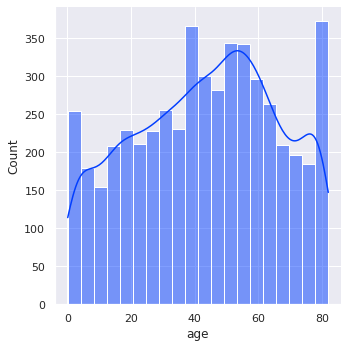

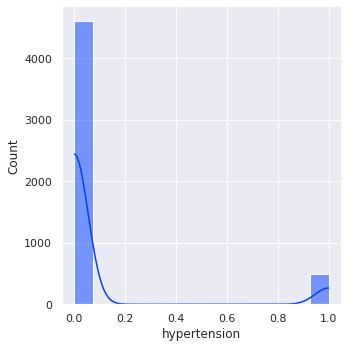

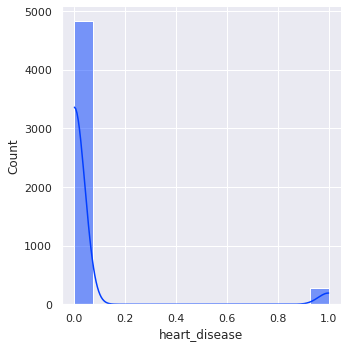

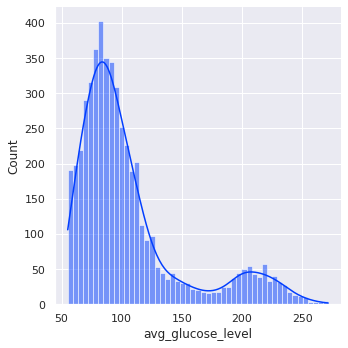

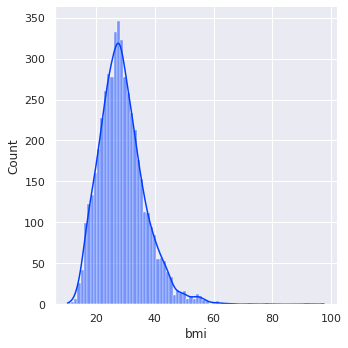

In [291]:
num_colss = num_cols[1:-1]

sns.set_theme(palette='bright')
for i in num_colss:
            sns.displot(data = data, x = i, multiple='dodge', kde = True)
            plt.show()

**Обработка  пропущенных значений**

Посмотрим количество пропущенных значений в нашем наборе данных.

In [292]:
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

Заполняем медианой:

In [293]:
data.fillna(data.median(axis = 0), axis=0 , inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


In [294]:
data.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

**Обработка категориальных признаков**

Для дальнейшей обработки данных закодируем категориальные признаки с помощью числовых.

In [295]:


data1 = data.copy()
encoder = LabelEncoder()
for i in cat_cols:
  data1[i] = encoder.fit_transform(data1[i])



In [296]:
data1.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,2,1,228.69,36.6,1,1
1,51676,0,61.0,0,0,1,3,0,202.21,28.1,2,1
2,31112,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,60182,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,1665,0,79.0,1,0,1,3,0,174.12,24.0,2,1


In [297]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   int64  
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   int64  
 6   work_type          5110 non-null   int64  
 7   Residence_type     5110 non-null   int64  
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   int64  
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(9)
memory usage: 479.2 KB


Строим матрицу корреляции.

Удобно использовать визуальный образ этой матрицы. Чем светлее ячейка, тем больше по абсолютной величине коэффициент корреляции.Некоторые виды коэффициентов корреляции могут быть положительными или отрицательными.Отрицательная корреляция — корреляция, при которой увеличение одной переменной связано с уменьшением другой.

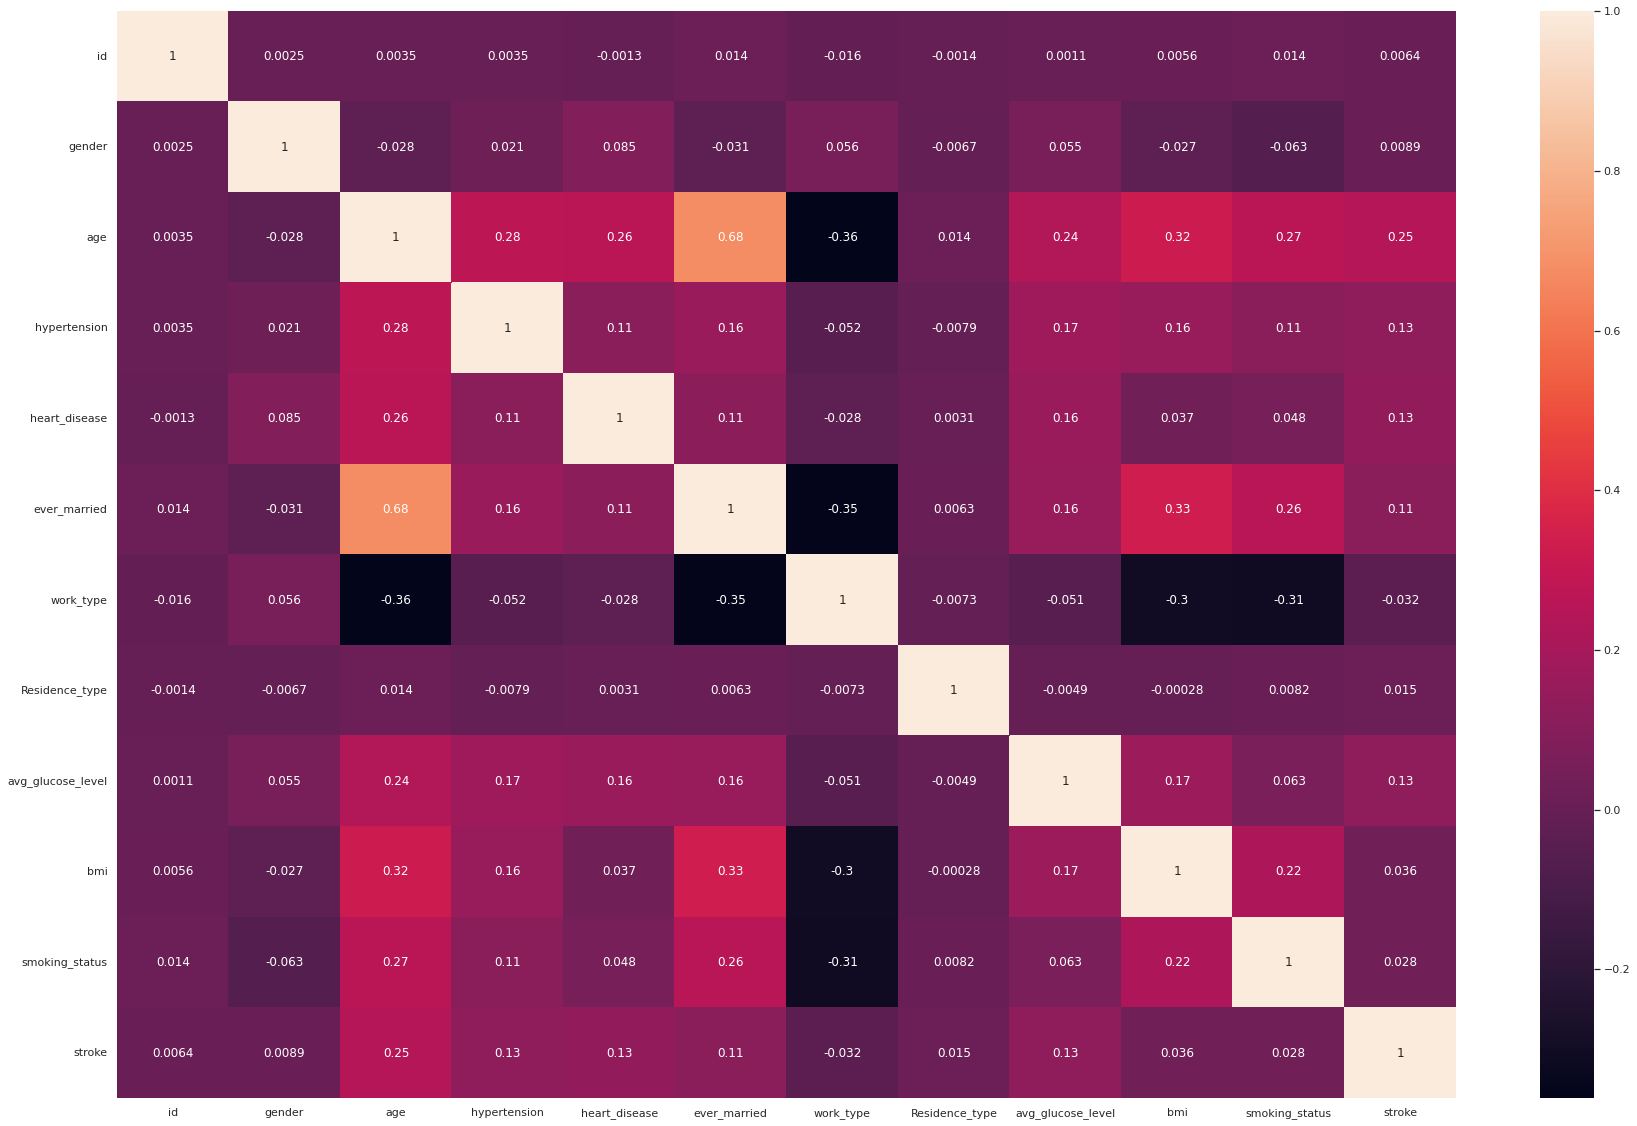

In [298]:
mask = np.zeros_like(data1.corr())
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(30,20))
    sns.heatmap(data1.corr(), annot = True)



Мы можем заметить, что в целом корреляция между признаками довольно слабая, однако есть признаки, между которыми корреляция более выражена.
Исходя из данных, наиболее сильная положительная корреляция 0.33 и 0.32 наблюдается между (признаками индекса массы тела (bmi) и ever_merried(замужем/женат ли)) и ( индекса массы тела (bmi) и возратом (age)).
Наиболее сильная отрицательная корреляция  -0.3 и -0.31 наблюдается между  признаками (smoking_status и work_type) и (bmi и work_type).

**Наличие выбросов**

Числовые признаки:


In [299]:
for i in data1.columns:
  print(data1[i].value_counts())

9046     1
22194    1
15104    1
28315    1
56996    1
        ..
897      1
4789     1
5686     1
37451    1
44679    1
Name: id, Length: 5110, dtype: int64
0    2994
1    2115
2       1
Name: gender, dtype: int64
78.00    102
57.00     95
52.00     90
54.00     87
51.00     86
        ... 
1.40       3
0.48       3
0.16       3
0.40       2
0.08       2
Name: age, Length: 104, dtype: int64
0    4612
1     498
Name: hypertension, dtype: int64
0    4834
1     276
Name: heart_disease, dtype: int64
1    3353
0    1757
Name: ever_married, dtype: int64
2    2925
3     819
4     687
0     657
1      22
Name: work_type, dtype: int64
1    2596
0    2514
Name: Residence_type, dtype: int64
93.88     6
91.68     5
91.85     5
83.16     5
73.00     5
         ..
111.93    1
94.40     1
95.57     1
66.29     1
85.28     1
Name: avg_glucose_level, Length: 3979, dtype: int64
28.1    230
28.7     41
28.4     38
26.7     37
27.6     37
       ... 
48.7      1
49.2      1
51.0      1
49.4      1
14.9  

**Нормализация признаков с помощью линейного преобразования:**



In [300]:
data_normal = (data1 - data1.min(axis=0)) / (data1.max(axis=0) - data1.min(axis=0))
data_normal.describe()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,0.500197,0.207143,0.526692,0.097456,0.054012,0.656164,0.541928,0.508023,0.235563,0.212624,0.458969,0.048728
std,0.290392,0.246522,0.276033,0.296607,0.226063,0.475034,0.272573,0.499985,0.209046,0.088197,0.357178,0.215320
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.242535,0.000000,0.304199,0.000000,0.000000,0.000000,0.500000,0.000000,0.102137,0.154639,0.000000,0.000000
50%,0.505880,0.000000,0.548340,0.000000,0.000000,1.000000,0.500000,1.000000,0.169721,0.203895,0.666667,0.000000
75%,0.749455,0.500000,0.743652,0.000000,0.000000,1.000000,0.750000,1.000000,0.272228,0.257732,0.666667,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Разбиение данных на обучающую и тестовую выборки**

In [301]:

X = data_normal.drop('stroke', axis = 1)
y = data_normal['stroke']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=1)

Создадим функцию для удобного подбора параметров

In [302]:

def cv_params(model, param_grid):
  scoring = 'neg_mean_absolute_error'
  opt_params = GridSearchCV(
      estimator = model, 
      param_grid = param_grid,
      scoring = scoring, 
      cv = 5,
      n_jobs = -1 ) 
  opt_params.fit(X_train,y_train)
  params = opt_params.best_params_
  best_score = opt_params.best_score_

  print(f'Best score:{round(-best_score,2)}')
  print(f'Best parameters:{params}\n')

  return params
  

Параметры для KNN




In [303]:


knn_param_grid = {
    'n_neighbors': np.arange(1,30), 
    'metric': ['manhattan', 'euclidean'],
    'weights': ['uniform', 'distance']
    
}
knn_clean = KNeighborsClassifier()
knn_params = cv_params(knn_clean,knn_param_grid)

Best score:0.05
Best parameters:{'metric': 'manhattan', 'n_neighbors': 10, 'weights': 'uniform'}



Параметры для RFC

In [304]:
from sklearn.ensemble import RandomForestClassifier
rf_param_grid = {
    'max_depth':[30,40,50,60,70],
    'n_estimators':[200,300,400,600,800]
}
rf_clean = RandomForestClassifier()
rf_params = cv_params(rf_clean,rf_param_grid)

Best score:0.05
Best parameters:{'max_depth': 40, 'n_estimators': 200}



In [305]:
import time
#knn
knn = KNeighborsClassifier(**knn_params)
knn.fit(X_train,y_train)
start_time = time.time()
pred_knn = knn.predict(X_test)
pred_knn_train = knn.predict(X_train)
err_test  = np.mean(y_test  != pred_knn)
err_train  = np.mean(y_train  != pred_knn_train)
end_time = time.time()
runtime = end_time - start_time
print('Error on train = ', err_train * 100)
print('Error on test = ', err_test* 100)
print('Runtime = ', runtime)



Error on train =  4.598825831702544
Error on test =  5.870841487279844
Runtime =  0.49991726875305176


Из результатов заметно, что на обучающей выборке ошибкa меньше, чем на тестовой, но не сильно

In [306]:
#rf

rf = RandomForestClassifier(**rf_params)
rf.fit(X_train,y_train)
start_time = time.time()
pred_rf = rf.predict(X_test)
pred_rf_train = rf.predict(X_train)
err_test  = np.mean(y_test  != pred_rf)
err_train  = np.mean(y_train  != pred_rf_train)
end_time = time.time()
runtime = end_time - start_time
print('Error on train = ', err_train * 100)
print('Error on test = ', err_test* 100)
print('Runtime = ', runtime)


Error on train =  0.0
Error on test =  6.066536203522505
Runtime =  0.1898488998413086


Используя случайный лес, ошибка на обучающуй выборке равно 0, а на тестовой ~6.

По результатам видно, что Random Forest дает более высокую точность на обучающей выборке, а на тестовой дает почти такую же, как в предыдущем методе, но работает он гораздо быстрее.  Сравнивая с методом ближайших соседей, в данном случае для задачи классификации лучше использовать Random Forest

**Вывод**

В рамках данного домашнего задания была рассмотрена задача классификации инсульта. 

Как итог выполненной лабораторной работы была решена задача классификации. Анализируя данные, мы выявляли, может ли случится инсульт у человека или нет. Обучение и классификация проводились с помощью агоритма ближайших k-соседей  и алгоритма Random Forest.С помощью функции, которая качественно и быстро перебирала параметры, быстро подобрали самые наилучшие. Значения ошибок получилось не большое, причем ошибка на тестовой выборке всегла была больше, чем на тренировочной.
